# 📘 MobileNetV3 - FER2013 - Train and Evaluation

Notebook này trình bày cách huấn luyện và đánh giá mô hình **MobileNetV3** trên tập dữ liệu cảm xúc khuôn mặt **FER2013**.

Nội dung gồm:
1.	Tải và tiền xử lý dữ liệu
2.	Định nghĩa mô hình (MobileNetV3)
3.	Huấn luyện mô hình
4.	Đánh giá: Độ chính xác (Accuracy), Ma trận nhầm lẫn (Confusion Matrix), Thời gian suy luận (Inference Time), Kích thước mô hình (Model Size)

Cấu trúc thư mục dữ liệu phải được tổ chức thành hai thư mục train/ và test/, mỗi thư mục chứa các thư mục con tương ứng với từng nhãn cảm xúc.

In [2]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

## 📂 1. Load and Preprocess Data
We use `ImageDataGenerator` to load images from folders.

In [3]:
IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '../Bai_4/data/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '../Bai_4/data/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '../Bai_4/data/test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## 🧠 2. Define MobileNetV3 Model
We use the pretrained MobileNetV3 (small variant) as base.

In [4]:
base_model = MobileNetV3Small(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(7, activation='softmax')  # 7 emotion classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)   │ (None, 7, 7, 576)      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 576)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │         4,039 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 943,159 (3.60 MB)

 Trainable params: 4,039 (15.78 KB)

 Non-trainable params: 939,120 (3.58 MB)

## 🏋️‍♂️ 3. Train the Model
We train for a few epochs with validation data.

In [5]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


718/718 ━━━━━━━━━━━━━━━━━━━━ 130s 177ms/step - accuracy: 0.2325 - loss: 1.8350 - val_accuracy: 0.2513 - val_loss: 1.8115
Epoch 2/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 139s 193ms/step - accuracy: 0.2393 - loss: 1.8192 - val_accuracy: 0.2513 - val_loss: 1.8118
Epoch 3/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 135s 188ms/step - accuracy: 0.2454 - loss: 1.8145 - val_accuracy: 0.2513 - val_loss: 1.8113
Epoch 4/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 173s 240ms/step - accuracy: 0.2500 - loss: 1.8105 - val_accuracy: 0.2545 - val_loss: 1.8194
Epoch 5/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 133s 185ms/step - accuracy: 0.2504 - loss: 1.8111 - val_accuracy: 0.2513 - val_loss: 1.8104
Epoch 6/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 132s 184ms/step - accuracy: 0.2535 - loss: 1.8088 - val_accuracy: 0.2513 - val_loss: 1.8144
Epoch 7/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 123s 172ms/step - accuracy: 0.2465 - loss: 1.8108 - val_accuracy: 0.2533 - val_loss: 1.8147
Epoch 8/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 130s 180ms/step - accuracy: 0.2508 - loss: 1.80

## 📊 4. Evaluation
We evaluate with accuracy, confusion matrix, inference time, and model size.

7178/7178 ━━━━━━━━━━━━━━━━━━━━ 81s 11ms/step - accuracy: 0.2213 - loss: 1.8870
Test Accuracy: 24.73%
7178/7178 ━━━━━━━━━━━━━━━━━━━━ 83s 12ms/step


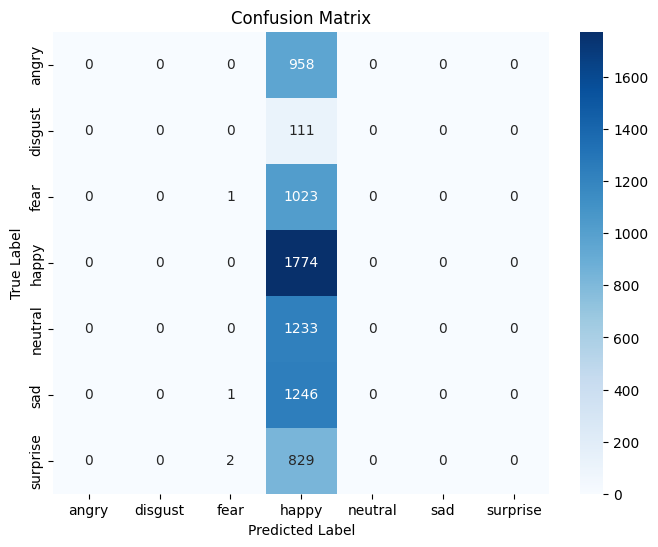

In [6]:
# Accuracy
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc * 100:.2f}%")

# Confusion Matrix
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [7]:
# Inference Time
import time
start = time.time()
_ = model.predict(test_generator)
end = time.time()

inference_time = (end - start) / len(test_generator.filenames) * 1000  # ms per image
print(f"Average Inference Time: {inference_time:.2f} ms/image")

7178/7178 ━━━━━━━━━━━━━━━━━━━━ 75s 10ms/step
Average Inference Time: 10.54 ms/image


In [8]:
# Model Size
model.save("mobilenetv3_fer2013.h5")
size_mb = os.path.getsize("mobilenetv3_fer2013.h5") / (1024 * 1024)
print(f"Model Size: {size_mb:.2f} MB")

Model Size: 3.94 MB
